# Scikit-learn ile Makine Öğrenmesi

**Açıklamalar:**
* Projede ekte verilen bir şirketin çalışanlarına ilişkin verileri içeren "insan_kaynaklari.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  ![image.png](attachment:image.png)
  3. Kategorik olmayan sütunlarda gerekiyorsa normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü ***uygun metrikler*** ile -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanabilirsiniz), test verisi üzerinde probleme uygun metrik**ler** -*veri setinin dengeli olup olmadığını da göz önünde bulundurarak*- kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

### **Veriyi Düzenleme ve Normalizasyon**

Dosya colab üzerinden çalıştırıldığı için okuma işlemi drive'dan yapılmıştır.

In [1]:
import pandas as pd
from sklearn import preprocessing
from google.colab import drive
drive.mount("/content/drive")
!ls "/content/drive/MyDrive/Colab Notebooks/VBG - Proje 2"
HRdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/VBG - Proje 2/insan_kaynaklari.csv")
#Jupyter üzerinde çalıştırıldığında :
#HRdata = pd.read_csv("insan_kaynaklari.csv")
HRdata.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 department_bar_chart.png   hr_histogram_plots.png  'VBG - Proje 2-Copy3.ipynb'
 Employee_Turnover.ipynb    insan_kaynaklari.csv    'VBG - Proje 2.ipynb'
 HR.csv			    salary_bar_chart.png


memnuniyet_duzeyi                float64
aldigi_degerlendirme_puani       float64
gerceklestirdigi_proje_sayisi      int64
aylik_ort_calisma_saati            int64
sirkette_calistigi_yil_sayisi      int64
is_kazasina_ugradi                 int64
sirketten_ayrildi                  int64
son_5_yilda_terfi_aldi             int64
calistigi_bolum                   object
maas_derecesi                     object
dtype: object

In [2]:
HRdata.isnull().any()

memnuniyet_duzeyi                False
aldigi_degerlendirme_puani       False
gerceklestirdigi_proje_sayisi    False
aylik_ort_calisma_saati          False
sirkette_calistigi_yil_sayisi    False
is_kazasina_ugradi               False
sirketten_ayrildi                False
son_5_yilda_terfi_aldi           False
calistigi_bolum                  False
maas_derecesi                    False
dtype: bool

In [3]:
HRdata.shape

(14999, 10)

In [4]:
data = pd.get_dummies(HRdata, columns=['calistigi_bolum','maas_derecesi'])
data.dtypes


memnuniyet_duzeyi                float64
aldigi_degerlendirme_puani       float64
gerceklestirdigi_proje_sayisi      int64
aylik_ort_calisma_saati            int64
sirkette_calistigi_yil_sayisi      int64
is_kazasina_ugradi                 int64
sirketten_ayrildi                  int64
son_5_yilda_terfi_aldi             int64
calistigi_bolum_IT                 uint8
calistigi_bolum_RandD              uint8
calistigi_bolum_accounting         uint8
calistigi_bolum_hr                 uint8
calistigi_bolum_management         uint8
calistigi_bolum_marketing          uint8
calistigi_bolum_product_mng        uint8
calistigi_bolum_sales              uint8
calistigi_bolum_support            uint8
calistigi_bolum_technical          uint8
maas_derecesi_high                 uint8
maas_derecesi_low                  uint8
maas_derecesi_medium               uint8
dtype: object

**Normalizasyon**
Veri setindeki iki farklı özelliğin (değişkenin) değerlerini en doğru şekilde analiz edebilmek için gerekli sütunlara normalizasyın işlemi uygulanmıştır.

In [5]:
normalization = preprocessing.MinMaxScaler().fit_transform(data.iloc[:,[2,3,4]])
normalization_data = pd.DataFrame(normalization, columns=data.iloc[:,[2,3,4]].columns)
data[data.iloc[:,[2,3,4]].columns] = normalization_data[data.iloc[:,[2,3,4]].columns]
data.head()

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum_IT,calistigi_bolum_RandD,calistigi_bolum_accounting,calistigi_bolum_hr,calistigi_bolum_management,calistigi_bolum_marketing,calistigi_bolum_product_mng,calistigi_bolum_sales,calistigi_bolum_support,calistigi_bolum_technical,maas_derecesi_high,maas_derecesi_low,maas_derecesi_medium
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

Veri kümesinin ne olduğunu ve bu verilerden istediğimiz çıktının ne olması gerektiğini bildiğimiz için bu problemde **Supervised Learning** tekniklerinden birini kullanmamız gerektiğini görüyoruz.  Verimizdeki anket sonuçlarında memnuniyet düzeyinin büyüklüğün bir fonksiyonu olarak sürekli bir çıktı olması nedeniyle bu problem bir **regresyon** problemidir. Nicel değişken (memnuniyet düzeyi) ilişkisine bakacağımızdan dolayı bu problemde **Lineer Regresyon** uygularız.

In [6]:
#Gerekli kütüphanelerin projeye import edilmesi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
import sklearn
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import confusion_matrix
import numpy as np

**Linear Regression without CrossValidation**

CrossValidation yöntemi uygulamadan Linear Regresyon modelinin ne kadar doğruluk değeri vereceğine baktım.

In [7]:
x= data.drop(['memnuniyet_duzeyi'],axis=1).values
y = data['memnuniyet_duzeyi'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle = False,random_state = 0)
ml = LinearRegression()
ml.fit(x_train,y_train)

y_train_predict = ml.predict(x_train)
y_test_predict = ml.predict(x_test)

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

mse_train = metrics.mean_squared_error(y_train, y_train_predict)
mse_test = metrics.mean_squared_error(y_test, y_test_predict)

print(f"Train R2 Score: {r2_train :.4f} MSE: {mse_train :.4f}")
print(f"Test R2 Score: {r2_test :9.4f} MSE: {mse_test:.4f}")

Train R2 Score: 0.1662 MSE: 0.0485
Test R2 Score:    0.2249 MSE: 0.0550


Train seti ile model kurulur ve test seti üzerinden modelin performansı değerlendirilir. Bu yöntemle farklı train-test bölünmeleri sonucunda farklı R2 değerleri elde edildigi için modelin performansını objektif bir şekilde değerlendirebildiğimizi söyleyemeyiz.

Text(0.5, 1.0, 'Actual vs. Predicted')

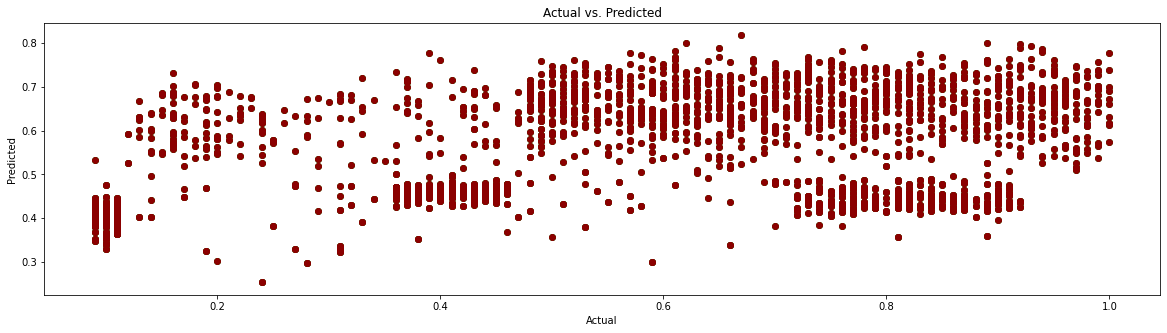

In [8]:
plt.figure(figsize=(20,5))
plt.scatter(y_test,y_test_predict,color=['green'])
plt.scatter(y_test,y_test_predict,color=['darkred'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

**K-Fold Cross Validation**

Amaç mümkün olduğunca doğru bir şekilde modelin performansını değerlendirmek olduğundan uyguladığım train-test split yaklaşımının yetersiz olduğunu görüyorum ve bu sebeple **K-Fold Cross Validation** yöntemi uyguluyorum. 

In [9]:
df_train, df_test = train_test_split(data, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)
y_train_df = df_train.pop('memnuniyet_duzeyi')
x_train_df = df_train

y_test_df = df_test.pop('memnuniyet_duzeyi')
x_test_df = df_test

In [10]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(LinearRegression(), x_train_df, y_train_df, scoring='r2', cv=folds)

10 kat çapraz doğrulama kullanarak üzerinde bir linear regresyon modelini değerlendidim. Veri kümesindeki R2 değerlerini ve bölünme sayısını tablo üzerinde gösterdim.

Text(0.5, 1.0, 'Number of Splits Score')

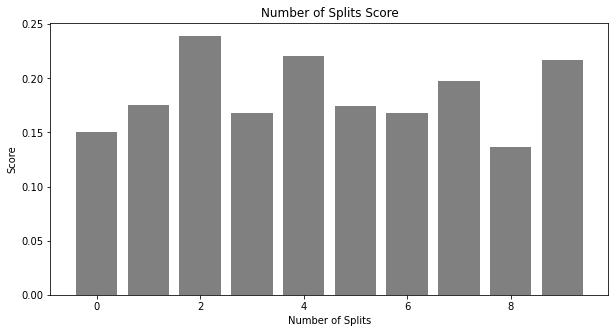

In [11]:
plt.figure(figsize=(10,5))
plt.bar(range(len(scores)),scores,color=['gray'])
plt.xlabel('Number of Splits')
plt.ylabel('Score')
plt.title('Number of Splits Score') 

**RepeatedKFold with RFE selected columns**

Her tekrarda farklı randomizasyonla K-Fold'u n kez tekrarlar. Bu nedenle, RepeatedKFold yönteminde her yinelemede, veri kümesinin K-katlarına tamamen farklı bir bölünmesi olacak ve modelin performans puanı da farklı olmasını sağlayacağından dolayı verimi bu model ile de test etmek istedim. CrossValidation işlemi uygulamadan önce ise RFE kullanarak veri üzerinde istediğim sonuçlara en çok etki eden sütunların seçilmesini sağladım. 

In [12]:
rfe = RFE(LinearRegression(), n_features_to_select=10)             
rfe = rfe.fit(x_train_df, y_train_df)

liste = list(zip(x_train_df.columns,rfe.support_,rfe.ranking_))

selected_columns=[]
for column in liste : 
    if(column[1]== True):
        selected_columns.append(column[0])
    
x1= data[selected_columns].values

Train R2 Score: 0.1947 MSE: 0.0496
Test R2 Score: 0.2054 MSE: 0.0497
----------------------------
Train R2 Score: 0.2010 MSE: 0.0501
Test R2 Score: 0.1884 MSE: 0.0474
----------------------------
Train R2 Score: 0.2009 MSE: 0.0496
Test R2 Score: 0.1892 MSE: 0.0494
----------------------------
Train R2 Score: 0.1980 MSE: 0.0490
Test R2 Score: 0.2018 MSE: 0.0515
----------------------------
Train R2 Score: 0.2004 MSE: 0.0493
Test R2 Score: 0.1913 MSE: 0.0506
----------------------------
Train R2 Score: 0.2033 MSE: 0.0490
Test R2 Score: 0.1801 MSE: 0.0516
----------------------------
Train R2 Score: 0.1989 MSE: 0.0496
Test R2 Score: 0.1969 MSE: 0.0494
----------------------------
Train R2 Score: 0.1937 MSE: 0.0500
Test R2 Score: 0.2181 MSE: 0.0475
----------------------------
Train R2 Score: 0.2036 MSE: 0.0491
Test R2 Score: 0.1787 MSE: 0.0512
----------------------------
Train R2 Score: 0.1960 MSE: 0.0498
Test R2 Score: 0.2089 MSE: 0.0486
----------------------------


Text(0.5, 1.0, 'Number of Repetitions Score')

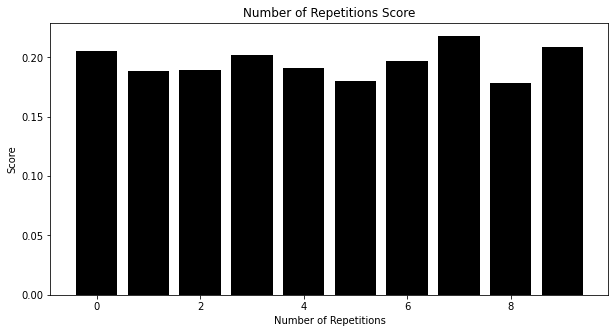

In [13]:
model = LinearRegression()
score_repeatedKF = []
cv = RepeatedKFold(n_splits=5,n_repeats=2, random_state=50)
for train_index, test_index in cv.split(x1):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    
    y_train_predict = model.predict(x_train)
    y_test_predict = model.predict(x_test)

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    mse_train = metrics.mean_squared_error(y_train, y_train_predict)
    mse_test = metrics.mean_squared_error(y_test, y_test_predict)
    print(f"Train R2 Score: {r2_train :.4f} MSE: {mse_train :.4f}")
    print(f"Test R2 Score: {r2_test :.4f} MSE: {mse_test:.4f}")
    score_repeatedKF.append(model.score(x_test, y_test))
    print("----------------------------")
plt.figure(figsize=(10,5))
plt.bar(range(len(score_repeatedKF)),score_repeatedKF,color=['black'])
plt.xlabel('Number of Repetitions')
plt.ylabel('Score')
plt.title('Number of Repetitions Score')

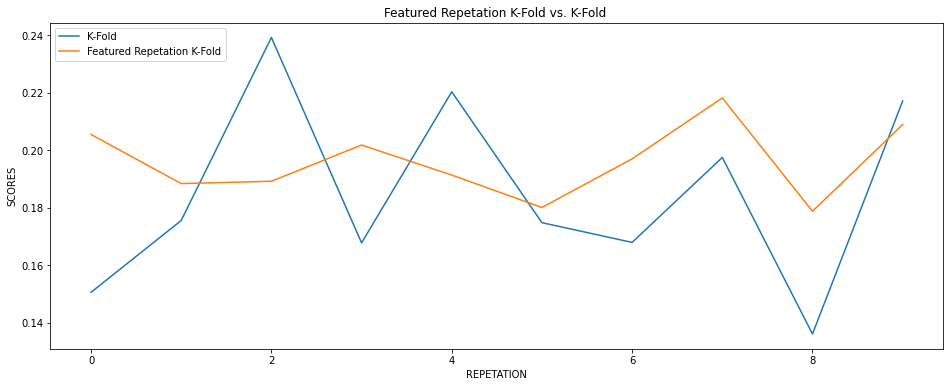

In [14]:
plt.figure(figsize=(16,6))

plt.plot(range(len(scores)), scores)
plt.plot(range(len(score_repeatedKF)), score_repeatedKF)
plt.xlabel('REPETATION')
plt.ylabel('SCORES')
plt.title("Featured Repetation K-Fold vs. K-Fold ")
plt.legend(['K-Fold', 'Featured Repetation K-Fold'], loc='upper left')

In [15]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

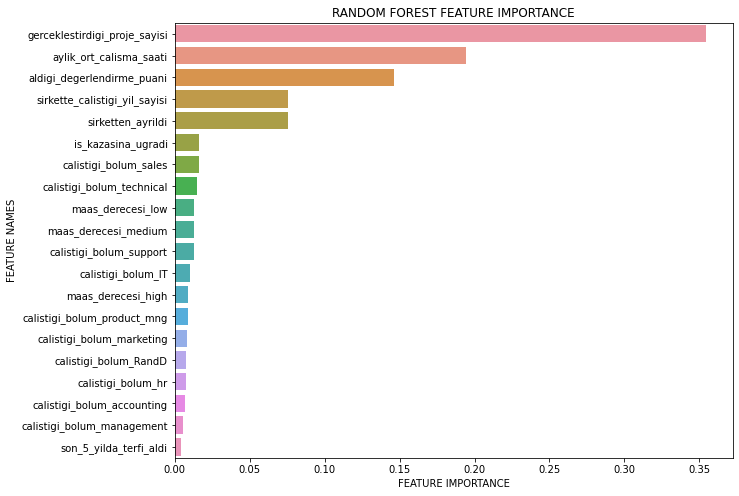

In [16]:
from sklearn.ensemble import RandomForestRegressor

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
plot_feature_importance(rf.feature_importances_,x_train_df.columns,'RANDOM FOREST ')


### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

Bu problemi çözerken Logistik Regression modelini kullandım.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import itertools

In [18]:
df_train, df_test = train_test_split(data, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)
y_train_df = df_train.pop('sirketten_ayrildi')
x_train_df = df_train

y_test_df = df_test.pop('sirketten_ayrildi')
x_test_df = df_test

x= data.drop(['sirketten_ayrildi'],axis=1).values
y = data['sirketten_ayrildi'].values


RFE kullanarak Logistic Regression için en uygun sütunların seçimleri yapılıp model kullanıldı.

In [19]:
rfe = RFE(LogisticRegression(), n_features_to_select=5)             
rfe = rfe.fit(x_train_df, y_train_df)

liste = list(zip(x_train_df.columns,rfe.support_,rfe.ranking_))

selected_columns=[]
for column in liste : 
    if(column[1]== True):
        selected_columns.append(column[0])
    
x2= data[selected_columns]

Logistic Regression için metrikler hesaplanarak yazdırıldı.

Confusion Matrix:  [[2102  168]
 [ 494  236]]
True Negatives:  2102
False Positives:  168
False Negatives:  494
True Positives:  236
Accuracy:  77.93333333333334
Precision:  0.5841584158415841
-----------------------
Confusion Matrix:  [[2145  173]
 [ 452  230]]
True Negatives:  2145
False Positives:  173
False Negatives:  452
True Positives:  230
Accuracy:  79.16666666666667
Precision:  0.5707196029776674
-----------------------
Confusion Matrix:  [[2137  148]
 [ 458  257]]
True Negatives:  2137
False Positives:  148
False Negatives:  458
True Positives:  257
Accuracy:  79.8
Precision:  0.6345679012345679
-----------------------
Confusion Matrix:  [[2104  170]
 [ 459  267]]
True Negatives:  2104
False Positives:  170
False Negatives:  459
True Positives:  267
Accuracy:  79.03333333333333
Precision:  0.6109839816933639
-----------------------
Confusion Matrix:  [[2124  157]
 [ 478  240]]
True Negatives:  2124
False Positives:  157
False Negatives:  478
True Positives:  240
Accuracy:  7

Text(0.5, 1.0, 'Number of Repetitions Score')

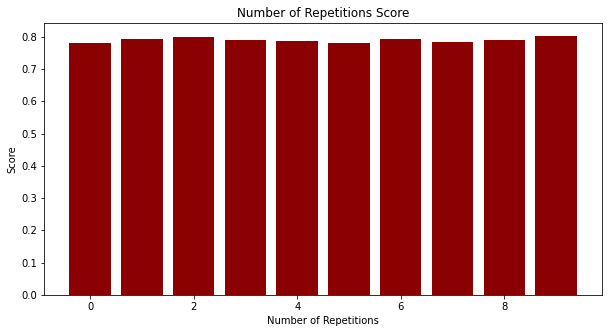

In [20]:
model = LogisticRegression()
cv = RepeatedKFold(n_splits=5,n_repeats=2, random_state=50)
score_repeatedKF = []
for train_index, test_index in cv.split(x2):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    
    y_test_predict = model.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_test_predict)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict).ravel()
    print("Confusion Matrix: ", cnf_matrix)
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
    print("Accuracy: ",format(Accuracy))
    Precision = tp/(tp+fp) 
    print("Precision: ",format(Precision))
    print("-----------------------")
    score_repeatedKF.append(model.score(x_test, y_test))
plt.figure(figsize=(10,5))
plt.bar(range(len(score_repeatedKF)),score_repeatedKF,color=['darkred'])
plt.xlabel('Number of Repetitions')
plt.ylabel('Score')
plt.title('Number of Repetitions Score')

  Logistik Regression modeline etki eden sütunlar ve sutünların model üzerindeki etkilerinin tablo üzerinde gösterimi.

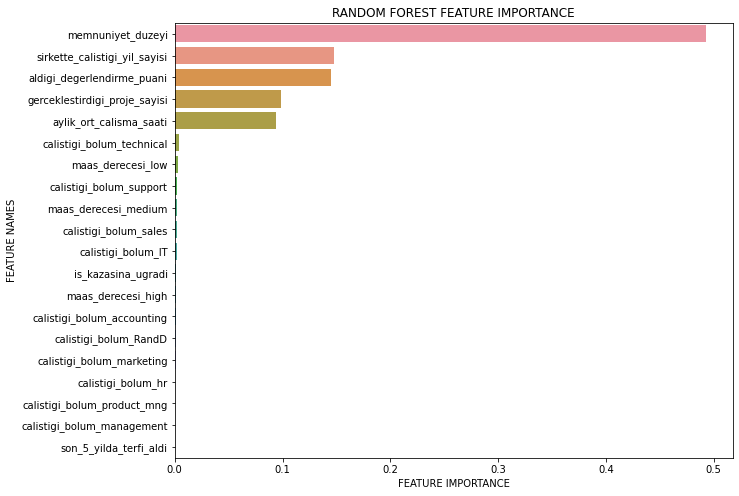

In [21]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)
plot_feature_importance(rf.feature_importances_,x_train_df.columns,'RANDOM FOREST ')

### Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [23]:
x= data.drop(['maas_derecesi_high','maas_derecesi_low','maas_derecesi_medium'], axis=1).values
y = data[['maas_derecesi_high','maas_derecesi_low','maas_derecesi_medium']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28)


In [24]:
randomForest_clf=RandomForestClassifier()
randomForest_clf.fit(X_train, y_train)
pred=randomForest_clf.predict(X_test)
print("Accuracy for Random Forest on data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on data:  0.5248888888888888


**Random Forest Manual Hiperparametre Optimizasyonu**

Random Forest algoritmasının hiperparametrelerinden olan “min_samples_leaf” için farklı değerler deneyerek accuracy skorlarının nasıl değiştiğini görmek için bu işlemi gerçekleştirdim.

[0.5257777777777778, 0.4948888888888889, 0.4628888888888889, 0.43466666666666665, 0.416, 0.4002222222222222, 0.3848888888888889, 0.36666666666666664, 0.36044444444444446, 0.3428888888888889]


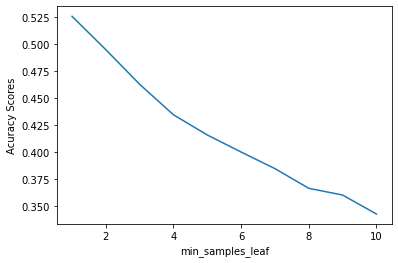

In [25]:
acc_scores = []
for n in range(1,11):
    rf = RandomForestClassifier(min_samples_leaf=n).fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))

print(acc_scores)
plt.plot(range(1,11), acc_scores)
plt.xlabel('min_samples_leaf')
plt.ylabel('Acuracy Scores')
plt.show()

Manual optimizasyon sonucu elde ettiğimiz çıktı ve görseli incelediğimizde min_samples_leaf=1 için modelin en yüksek accuracy skorunu verdiğini ve bu skorun 0.525 olduğunu gözlemledik.
Burada sadece bir hiperparametre üzerinden 10 farklı değeri deneyerek en iyi sonucu veren hiperparametre değerini bulmaya çalıştık. Denenmek istenen çok sayıda hiperparametre ve değeri olduğunda optimizasyonun manual olarak yapılamayacağı açıktır. Bu ihtiyaçtan dolayı GridSearchCV veya RandomizedSearchCV yöntemleri kullanılır.


**GridSearchCV İle Hiperparametre Optimizasyonu**


Çalışması çok uzun sürdüğü için her seferinde tekrar çalışmaması adına bazı kodlar yorum satırına alınmıştır.

In [26]:
param_grid = dict(
    n_estimators= [100, 500], 
    max_features= ['auto', 'sqrt'],
    max_depth= [2, 3, 5, 10, 15], 
    min_samples_split= [2, 5, 10],
    min_samples_leaf= [1, 2, 4],
    criterion = ['gini','entropy']
)

#random_forest_clf = RandomForestClassifier(random_state=42)
#gridSearch = GridSearchCV(random_forest_clf, param_grid=param_grid,  cv=5, verbose=1, n_jobs=-1)
#gridSearch.fit(X_train, y_train)
#gridSearch.best_params_

GridSearchCV classifier'ının çalışması çok uzun sürdüğü için çalıştırıldıktan sonraki ekran görüntüsü : 


---
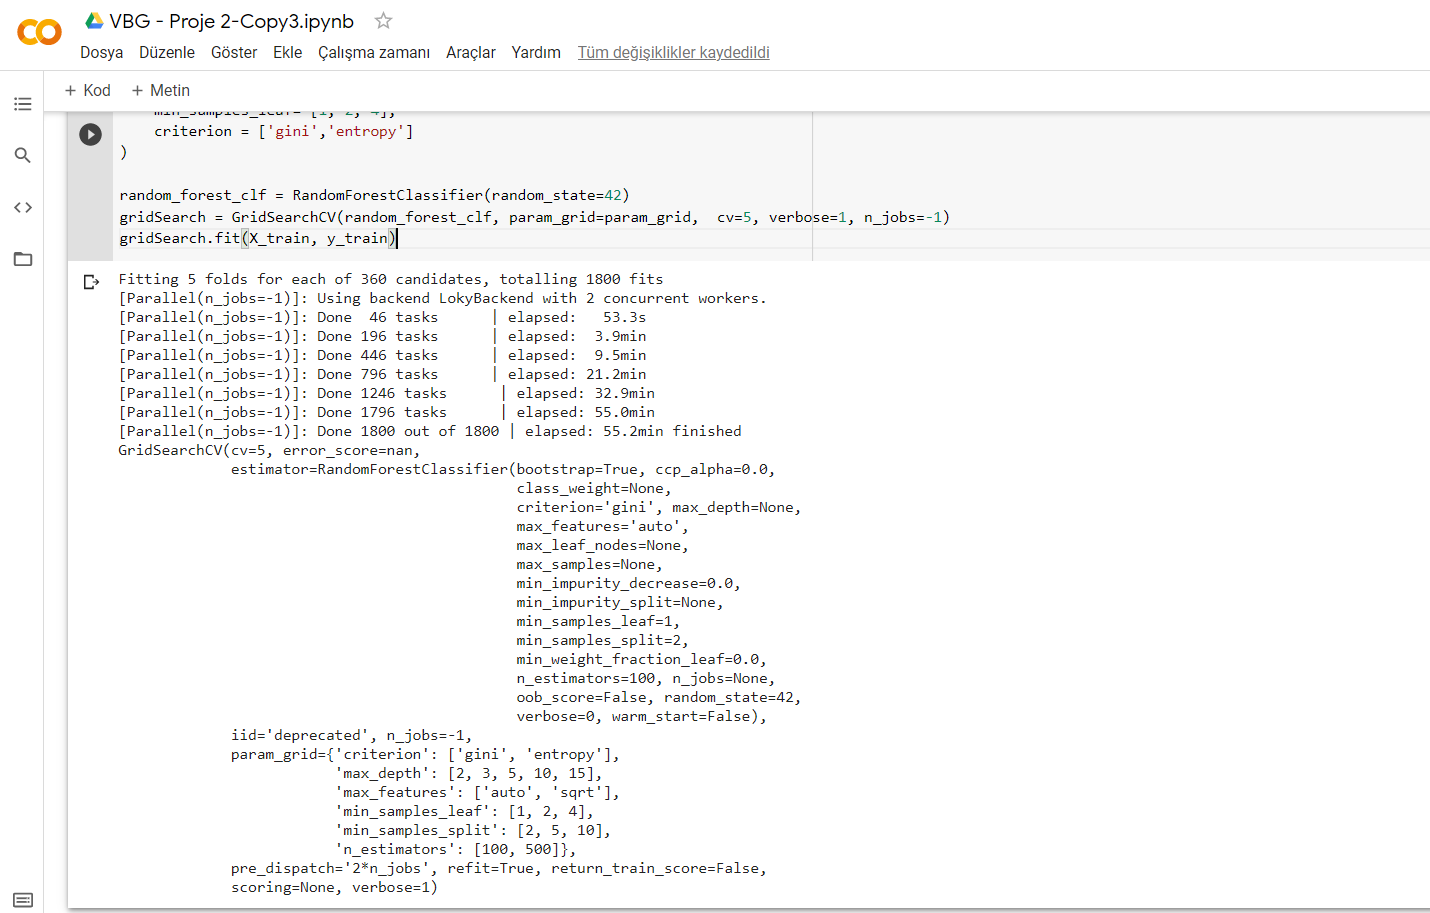



GridSearchCV ile seçilen parametreleri RandomForest modeli üzerinde uyguladıktan sonra ve verisetindeki Accurancy oranı hesaplandım ve yazdırdım.

In [28]:
randomForest_clf1=RandomForestClassifier(random_state=42, max_features='auto', max_depth= 50, min_samples_leaf = 1, min_samples_split =  2, n_estimators = 100, criterion = 'gini')
randomForest_clf1.fit(X_train, y_train)
pred=randomForest_clf1.predict(X_test)
print("Accuracy for Random Forest on data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on data:  0.5293333333333333


Veri küçük bir veri seti olmasına rağmen tüm bu işlemlerin yapılması neredeyse 1 saat sürdü. Zaman açısından değerlendirildiğinde çok maaliyetli bir yöntem olduğunu gördüm. Bu sebeple RandomizedCV yöntemi denedim. RandomizedSearchCV tüm ihtilmalleri tek tek denemediği için her zaman en iyi skoru vereceğini garanti edemesede, maaliyet açısından değerlendirildiğinde pratikte kendisine GridSearchCV den daha iyidir.

**Random Forest RandomizedSearchCV ile Hiperparametre Optimizasyonu**

GridSeaarchCV ye benzer şekilde, denenmesi istenen hiperparametreleri ve degerlerini bir sözlük yapısında tanımladım. Daha sonra  import edilen RandomizedSearchCV metodu ile gerekli parametreleri belirttim. Daha kısa sürede GridSearchCV ile elde ettiğim skoru elde ettim.Dolayısıyla zaman açısından düşünüldüğünde büyük veri setlerinde RandomizedCV tercih edilebilir.

In [30]:
x= data.drop(['maas_derecesi_high','maas_derecesi_low','maas_derecesi_medium'], axis=1).values
y = data[['maas_derecesi_high','maas_derecesi_low','maas_derecesi_medium']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28)

rf_params = {'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': range(1,11),
    'min_samples_split': range(1,15,5),
    'n_estimators': [100, 200, 300,500,1000]}
rf = RandomForestClassifier()
rf_randomcv_model = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
rf_randomcv_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'n_estimators': 100}

In [31]:
print('RESULT\n----------------------------------------------')
print('Random Forest RandomizedSearchCV model accuracy score = {}'.format(rf_randomcv_model.best_score_))

RESULT
----------------------------------------------
Random Forest RandomizedSearchCV model accuracy score = 0.43099289911295635


**K-NN Algoritması ile Hesaplama**


Veri üzerindeki doğruluk oranını görmek için K-NN  kullarak problemin çözümünü yaptım ve bu model ile bulduğum accurancy oranını yazdırdım.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

x= data.drop(['maas_derecesi_high','maas_derecesi_low','maas_derecesi_medium'], axis=1).values
y = data[['maas_derecesi_high','maas_derecesi_low','maas_derecesi_medium']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 28)
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_test_predict = knn.predict(X_test)
print("Accuracy for K-NN on data: ",accuracy_score(y_test, y_test_predict))

Accuracy for K-NN on data:  0.484


### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

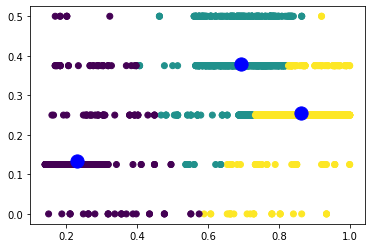

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clustering_employee = data[["aylik_ort_calisma_saati","sirkette_calistigi_yil_sayisi"]][data.sirketten_ayrildi == 1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(clustering_employee)

clustering_employee['label'] = kmeans.labels_

plt.scatter(clustering_employee['aylik_ort_calisma_saati'], clustering_employee['sirkette_calistigi_yil_sayisi'], c=clustering_employee['label'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=700, c="blue" , marker=".")
plt.show()